In [68]:
import numpy as np 
import pandas as pd 
import lightgbm as lgb
import xgboost as xgb
import catboost as ctb
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import sparse
import warnings
import time
import sys
import os
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth',100)

In [69]:
train = pd.read_csv("./train.csv", encoding = 'gb18030')
test = pd.read_csv("./test.csv", encoding = 'gb18030')

In [70]:
# 删除类别唯一的特征
for df in [train, test]:
    df.drop(['B3', 'B13', 'A13', 'A18', 'A23'], axis=1, inplace=True)

In [71]:
# 删除异常值
train = train[(train['score'] > 0.87) & (train['B14'] > 40) & (train['A6'] < 51) & (train['B4'] > 4)]

In [72]:
columns = [f for f in train.columns if f not in ['score', 'sample_id']]
for col in columns:
    print(col + ":")
    try:
        print('    train :' + str(train[col].std()))
        print('    test  :' + str(test[col].std()))
    except:
        continue

A1:
    train :9.876903783702662
    test  :8.16496580927726
A2:
    train :0.0
    test  :0.0
A3:
    train :12.963679683772575
    test  :11.134612334371354
A4:
    train :51.80304959157987
    test  :43.7825110906732
A5:
A6:
    train :5.097461941560409
    test  :8.737442891224235
A7:
A8:
    train :2.6912590972609487
    test  :0.3233808333817773
A9:
A10:
    train :0.9027709453773438
    test  :0.9244382779579797
A11:
A12:
    train :0.9163088535344647
    test  :0.877854818733741
A14:
A15:
    train :0.9590262929151713
    test  :1.125500435550807
A16:
A17:
    train :1.3347312564884808
    test  :1.4068550612308868
A19:
    train :50.35724935601631
    test  :62.46069009870339
A20:
A21:
    train :4.993018231417078
    test  :4.760952285695234
A22:
    train :0.3687557740499844
    test  :0.33371342982242697
A24:
A25:
    train :4.765913227041704
    test  :4.84952233319414
A26:
A27:
    train :3.0511894457758526
    test  :4.021662726599878
A28:
B1:
    train :103.367075140512

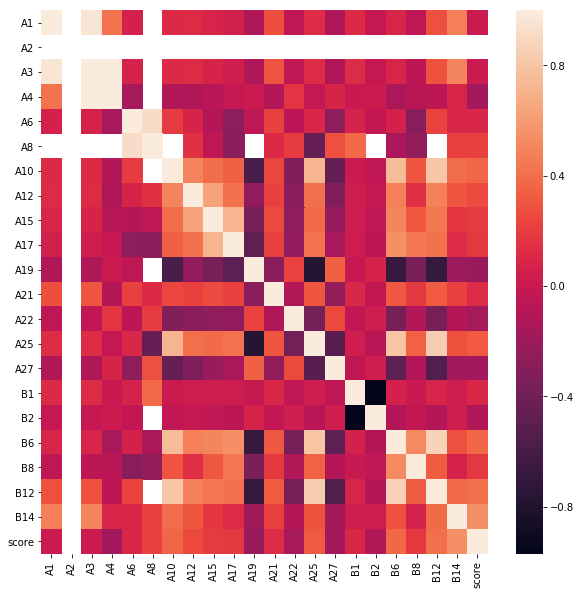

In [75]:
rel = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(rel)
plt.show()

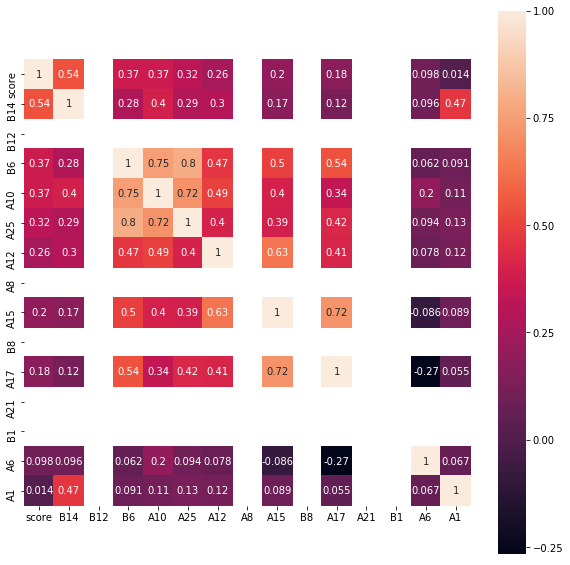

In [76]:
k = 15
cols = rel.nlargest(k, 'score')['score'].index
cm = np.corrcoef(train[cols].values.T)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

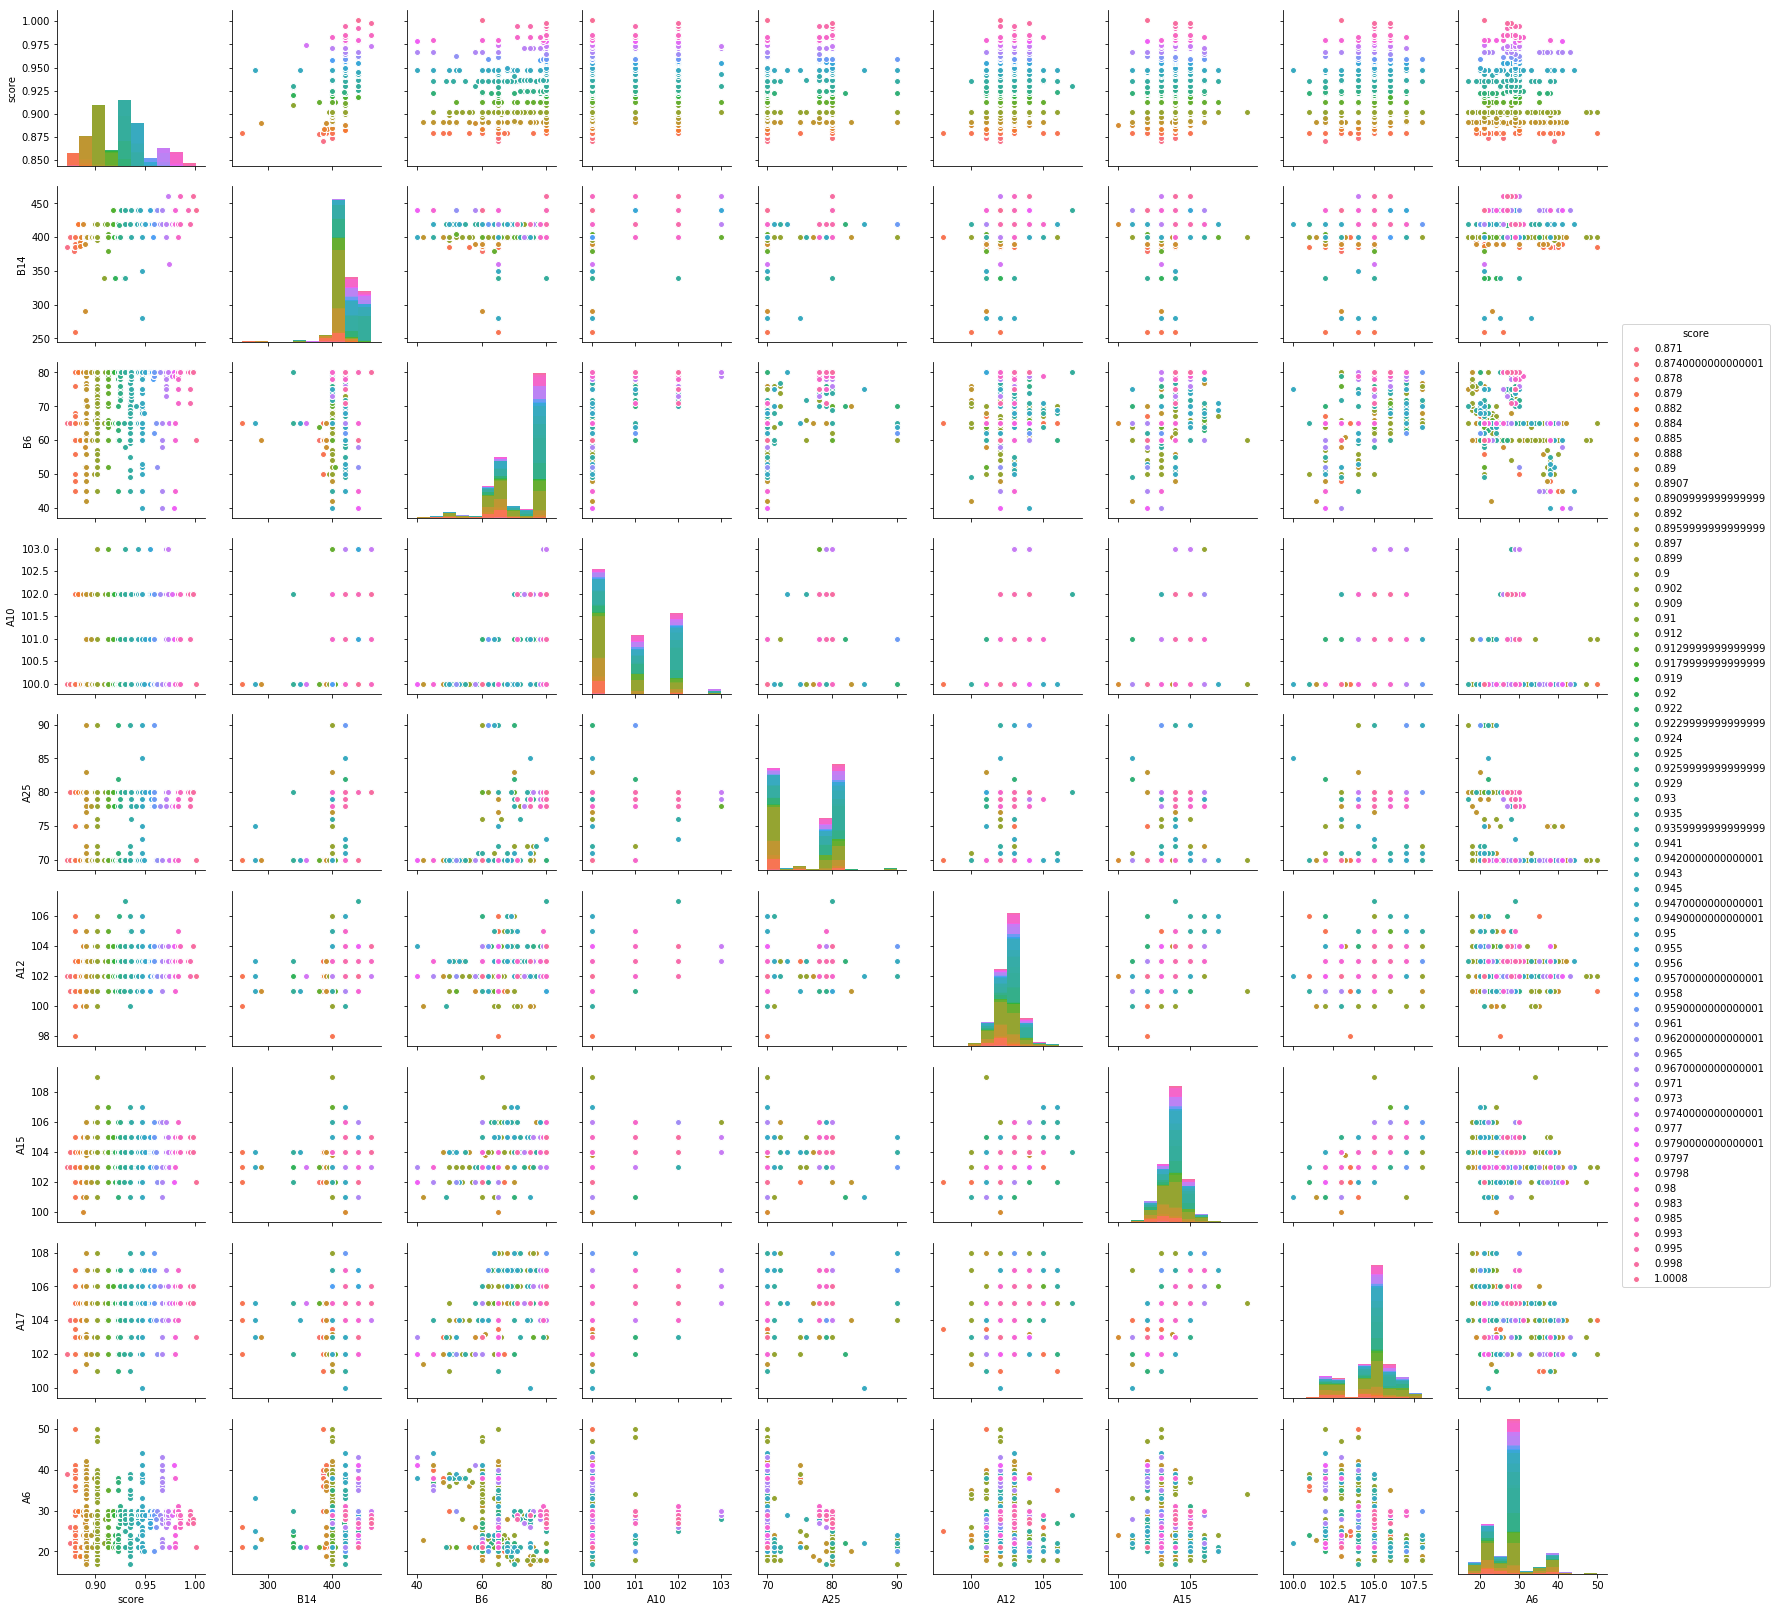

In [77]:
cols = ['score', 'B14', 'B6', 'A10', 'A25', 'A12', 'A15', 'A17', 'A6']
plt.figure(figsize=(10,10))
sns.pairplot(train[cols], hue="score")
plt.show()

In [73]:
train['B14'].value_counts()

400    727
420    329
440    225
460     35
390     14
385     14
340      7
280      4
260      3
380      2
392      1
395      1
360      1
350      1
405      1
290      1
418      1
387      1
Name: B14, dtype: int64

In [74]:
test['B14'].value_counts()

400    79
420    36
440    27
460     3
390     2
385     1
280     1
785     1
Name: B14, dtype: int64